# Analysis ARPACK MAC results

Get occupied and virtual frontier MOs and check if they came from the same structures.

In [7]:
%matplotlib widget

from os import path
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from qcnico.coords_io import read_xsf
from qcnico.qcplots import plot_MO
from remove_dangling_carbons import remove_dangling_carbons


datadir = path.expanduser("~/Desktop/simulation_outputs/percolation/40x40")
posdir = path.join(datadir, "structures")
edir = path.join(datadir, 'eARPACK')
Mdir = path.join(datadir,'MOs_ARPACK')

edir_occ = path.join(edir, 'occupied')
edir_vir = path.join(edir, 'virtual')

Mdir_occ = path.join(Mdir, 'occupied')
Mdir_vir = path.join(Mdir, 'virtual')


occ_lbls = np.sort(list(map(int, [f.split('-')[1].split('.')[0] for f in glob(Mdir_occ+'/*npy')])))
vir_lbls = np.sort(list(map(int, [f.split('-')[1].split('.')[0] for f in glob(Mdir_vir+'/*npy')])))

print(occ_lbls.shape)
print(vir_lbls.shape)



# Only work with vir_lbls since not all virtual runs finished, makes it easier to compare

e_arpack_occ = [np.load(edir_occ+f'/eARPACK_bigMAC-{nn}.npy') for nn in vir_lbls] 
e_arpack_vir = [np.load(edir_vir+f'/eARPACK_bigMAC-{nn}.npy') for nn in vir_lbls]

rCC = 1.8

def mos_arpack(Mdir,lbls):
    for nn in lbls:
        yield np.load(Mdir+f'/MOs_ARPACK_bigMAC-{nn}.npy')

def energies_arpack(edir,lbls):
    for nn in lbls:
        yield np.load(edir+f'/eARPACK_bigMAC-{nn}.npy')


def gen_pos(posdir, lbls, rCC):
    for nn in lbls:
        yield remove_dangling_carbons(read_xsf(path.join(posdir,f"bigMAC-{nn}_relaxed.xsf"))[0], rCC)




(300,)
(285,)


## Check 2: General appearance and localisation properties of ARPACK MOs on large graphene ribbons

## Check 3: General appearance and localisation properties of ARPACK MOs on large graphene ribbons

Make sure that $E_{HOMO} < E_{LUMO}$ for all MACs.

In [18]:
nlbls = vir_lbls.shape[0]
bandgaps = np.zeros(nlbls)
for k, eoccs, evirts in zip(range(nlbls),e_arpack_occ, e_arpack_vir):
    eHOMO = np.max(eoccs)
    eLUMO = np.min(evirts)
    bandgaps[k] = eLUMO - eHOMO
    print('Nb virt = ', evirts.shape[0])
    print('Nb occ = ', eoccs.shape[0])


print('Number of problematic structures = ', (bandgaps < 0).sum())



Nb virt =  114
Nb occ =  143
Nb virt =  109
Nb occ =  138
Nb virt =  115
Nb occ =  145
Nb virt =  115
Nb occ =  139
Nb virt =  124
Nb occ =  145
Nb virt =  114
Nb occ =  138
Nb virt =  114
Nb occ =  135
Nb virt =  109
Nb occ =  142
Nb virt =  114
Nb occ =  154
Nb virt =  116
Nb occ =  152
Nb virt =  101
Nb occ =  139
Nb virt =  100
Nb occ =  143
Nb virt =  118
Nb occ =  144
Nb virt =  111
Nb occ =  138
Nb virt =  111
Nb occ =  151
Nb virt =  114
Nb occ =  141
Nb virt =  114
Nb occ =  134
Nb virt =  104
Nb occ =  148
Nb virt =  106
Nb occ =  151
Nb virt =  107
Nb occ =  147
Nb virt =  104
Nb occ =  152
Nb virt =  112
Nb occ =  148
Nb virt =  105
Nb occ =  149
Nb virt =  108
Nb occ =  148
Nb virt =  111
Nb occ =  145
Nb virt =  118
Nb occ =  154
Nb virt =  114
Nb occ =  153
Nb virt =  107
Nb occ =  150
Nb virt =  108
Nb occ =  143
Nb virt =  115
Nb occ =  144
Nb virt =  123
Nb occ =  146
Nb virt =  112
Nb occ =  143
Nb virt =  115
Nb occ =  146
Nb virt =  105
Nb occ =  151
Nb virt =  111

Check spacing between adjacent energies for each structure

In [24]:
occ_diffdata = np.zeros((nlbls,5))
vir_diffdata = np.zeros((nlbls,5))
for k in range(nlbls):
    eoccs = np.sort(e_arpack_occ[k])
    evirts = np.sort(e_arpack_vir[k])
    
    diffs_occ = np.diff(eoccs)
    diffs_virt = np.diff(evirts)

    occ_diffdata[k, 0] = np.mean(diffs_occ) 
    vir_diffdata[k, 0] = np.mean(diffs_virt)

    iocc = np.argsort(diffs_occ) 
    ivirt = np.argsort(diffs_virt) 

    occ_diffdata[k,1] = diffs_occ[iocc[-1]] #max inter-level spacing
    vir_diffdata[k,1] = diffs_virt[ivirt[-1]] #max inter-level spacing
    occ_diffdata[k,2] = diffs_occ[iocc[0]] #min inter-level spacing
    vir_diffdata[k,2] = diffs_virt[ivirt[0]] #min inter-level spacing

    # Relative positions of max/min spacing
    occ_diffdata[k,3] = iocc[-1] / eoccs.shape 
    vir_diffdata[k,3] = ivirt[-1] / evirts.shape
    occ_diffdata[k,4] = iocc[0] / eoccs.shape
    vir_diffdata[k,4] = ivirt[0] / evirts.shape

[plt_utils.histogram] dx = 6.786919965701203e-07
[plt_utils.histogram] dx = 9.368435916432949e-07


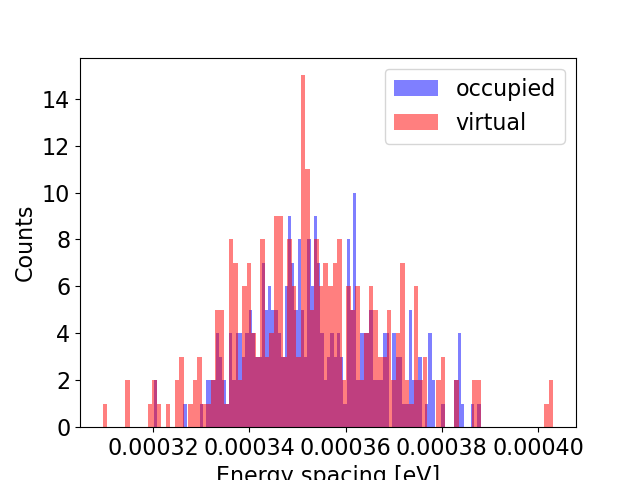

[plt_utils.histogram] dx = 1.287362626609362e-05
[plt_utils.histogram] dx = 1.3687122257915046e-05
[plt_utils.histogram] dx = 7.132315062227668e-07
[plt_utils.histogram] dx = 5.202935433354372e-07


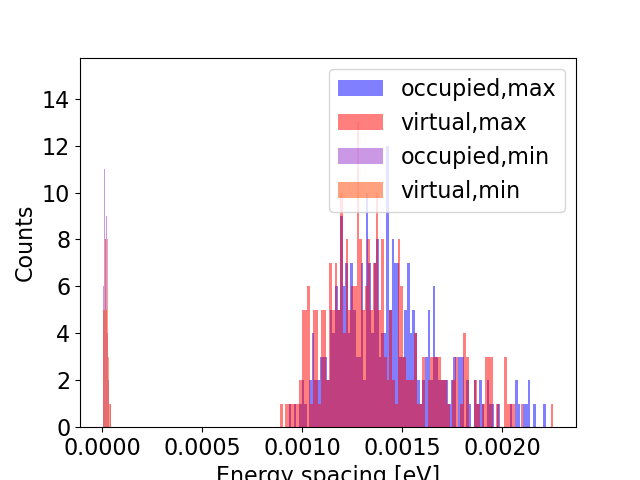

In [27]:
from qcnico.plt_utils import histogram

fig, ax = plt.subplots()

histogram(occ_diffdata[:,0],plt_objs=(fig,ax),plt_kwargs={'color':'b', 'alpha':0.5, 'label':'occupied'},xlabel='Energy spacing [eV]',show=False)
histogram(vir_diffdata[:,0],plt_objs=(fig,ax),plt_kwargs={'color':'r', 'alpha':0.5, 'label':'virtual'},xlabel='Energy spacing [eV]',show=False)
plt.legend()
plt.show()


fig, ax = plt.subplots()

histogram(occ_diffdata[:,1],plt_objs=(fig,ax),plt_kwargs={'color':'b', 'alpha':0.5, 'label':'occupied,max'},xlabel='Energy spacing [eV]',show=False)
histogram(vir_diffdata[:,1],plt_objs=(fig,ax),plt_kwargs={'color':'r', 'alpha':0.5, 'label':'virtual,max'},xlabel='Energy spacing [eV]',show=False)


histogram(occ_diffdata[:,2],plt_objs=(fig,ax),plt_kwargs={'color':'darkorchid', 'alpha':0.5, 'label':'occupied,min'},xlabel='Energy spacing [eV]',show=False)
histogram(vir_diffdata[:,2],plt_objs=(fig,ax),plt_kwargs={'color':'orangered', 'alpha':0.5, 'label':'virtual,min'},xlabel='Energy spacing [eV]',show=False)
plt.legend()
plt.show()

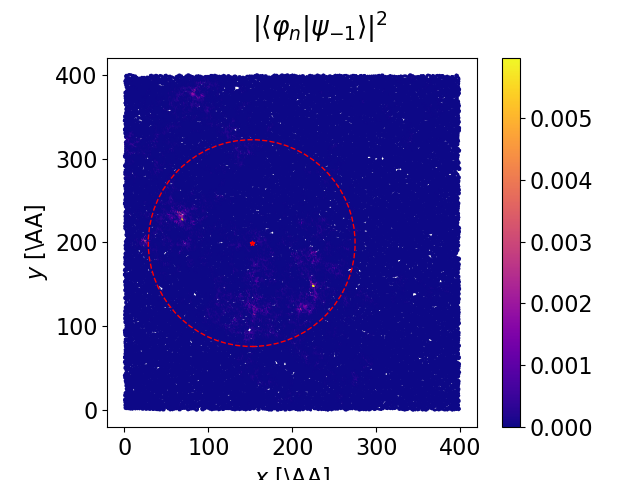

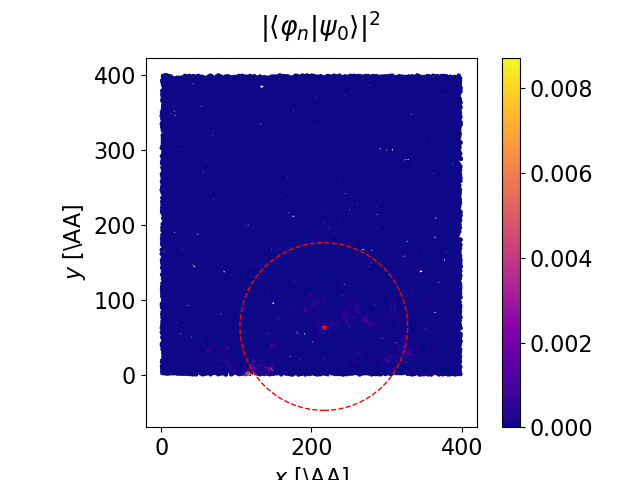

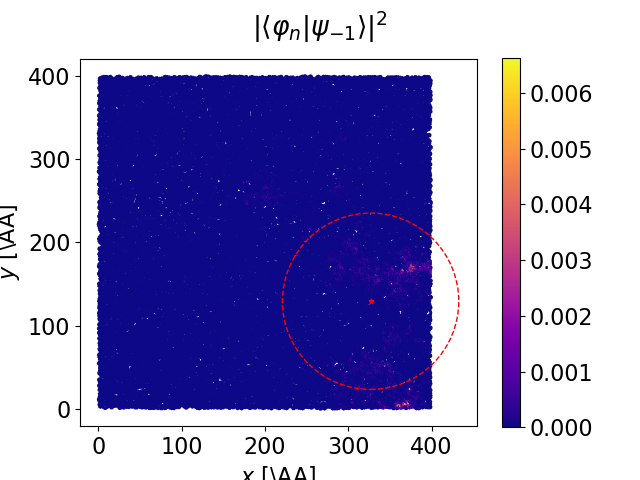

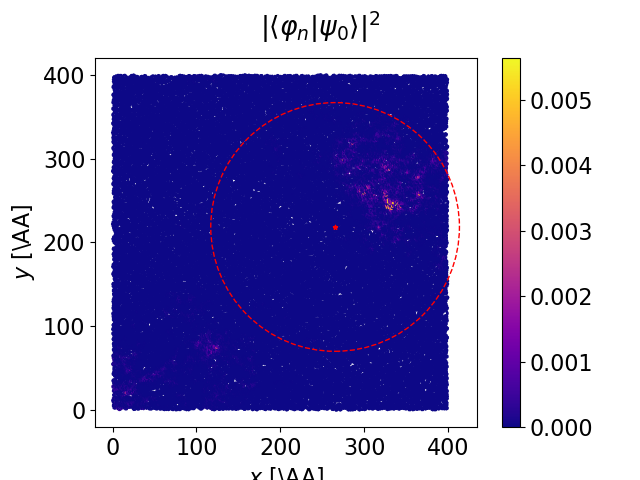

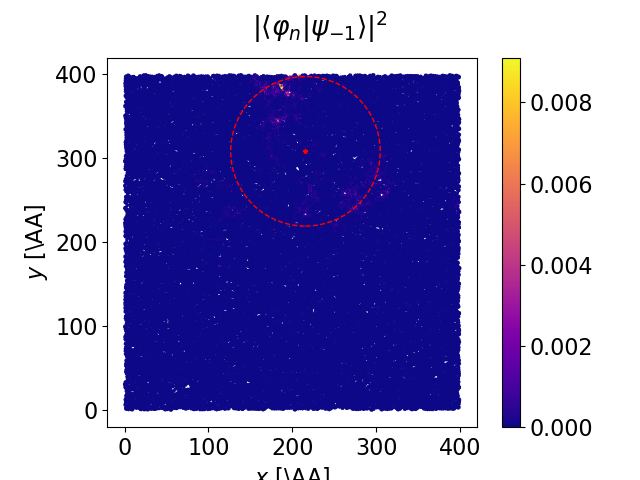

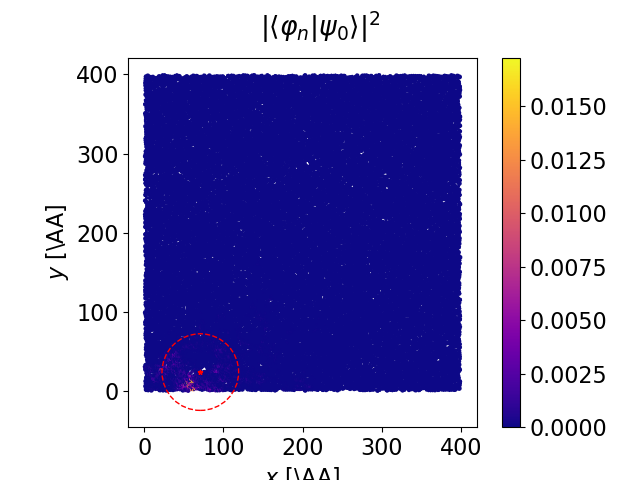

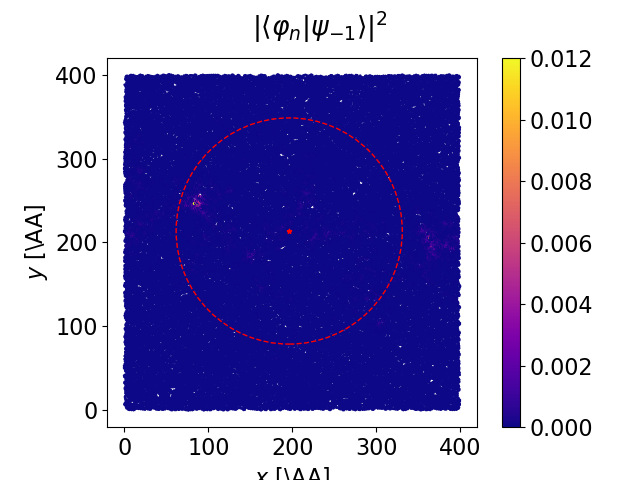

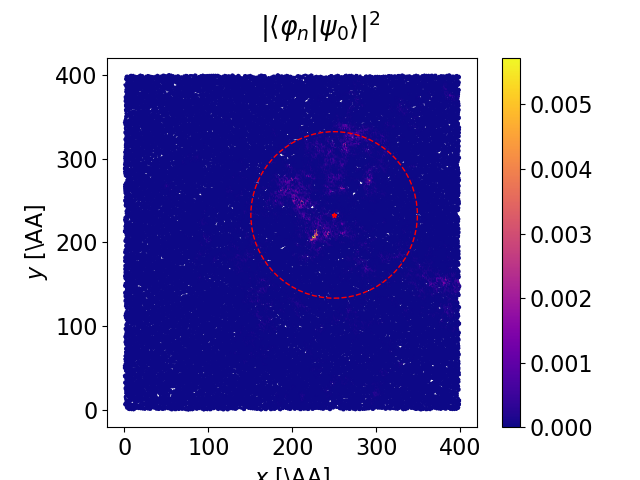

In [34]:
from qcnico.qcplots import plot_MO

eps = 1e-14
sample_inds = vir_lbls[(bandgaps < eps).nonzero()[0][:4]]

for pos, Mocc, Mvir in zip(gen_pos(posdir, sample_inds,rCC),mos_arpack(Mdir_occ,sample_inds), mos_arpack(Mdir_vir,sample_inds)):
    plot_MO(pos,Mocc,-1,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)
    plot_MO(pos,Mvir,0,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)


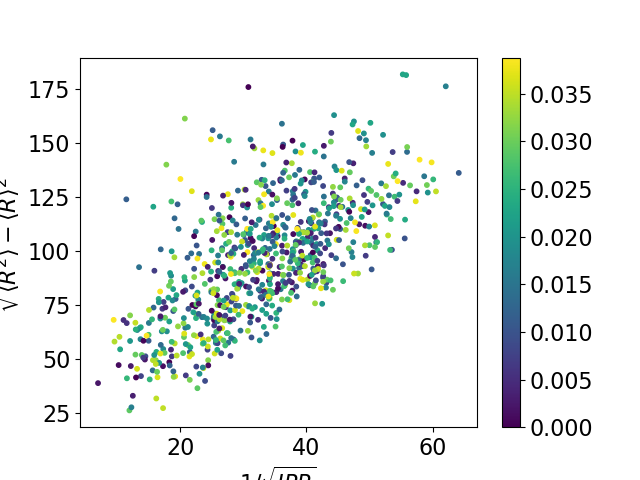

In [5]:

from qcnico.qchemMAC import inverse_participation_ratios, MO_rgyr
from qcnico.qcplots import plot_loc_discrep

fig, ax = plt.subplots()

ns = len(ee)

for k, e, M, pos in zip(range(ns), ee, MM, posarrs):
    e -= e[0]
    iprs = inverse_participation_ratios(M)
    rgyrs = MO_rgyr(pos,M)
    if k == 0:
        plot_loc_discrep(iprs, rgyrs, e, usetex=False, show=False,plt_objs=(fig,ax),show_cbar=True)
    else:
        plot_loc_discrep(iprs, rgyrs, e, usetex=False, show=False,plt_objs=(fig,ax),show_cbar=False)

plt.show()


In [29]:
np.save('vir_lbls.npy', vir_lbls)
natoms = np.zeros(nlbls,dtype='int')
for k, pos in enumerate(gen_pos(posdir, vir_lbls,rCC)):
    natoms[k] = pos.shape[0]

np.save('natoms.npy', natoms)

# Band gap check

**** 10 ****
eLUMO - eHOMO = -0.0009324262341122991 eV


**** 101 ****
eLUMO - eHOMO = 5.551115123125783e-16 eV
MO difference =  2.000000000000001


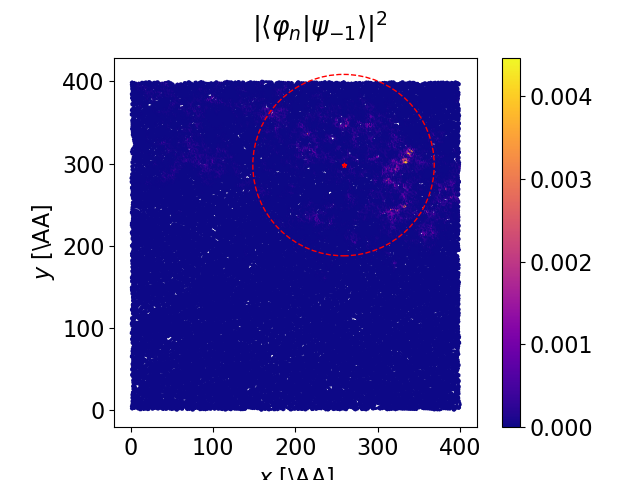

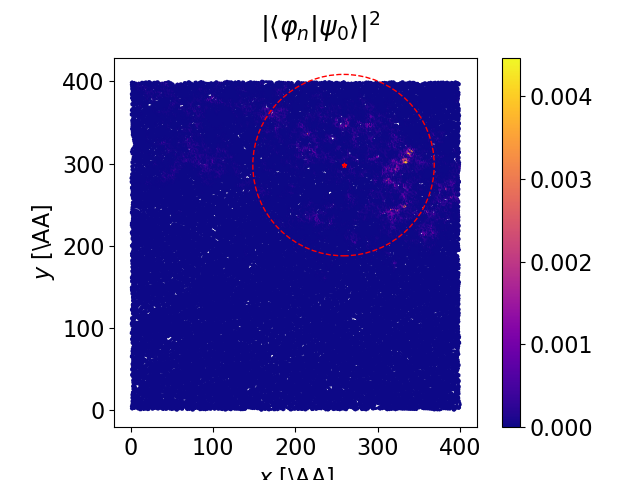



**** 102 ****
eLUMO - eHOMO = -2.4702462297909733e-15 eV
MO difference =  2.0


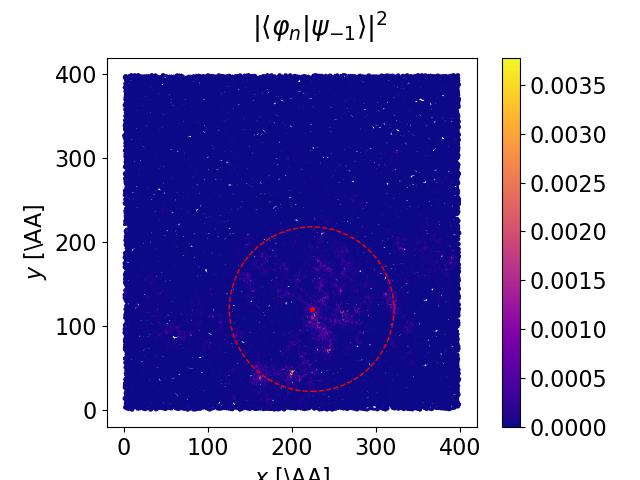

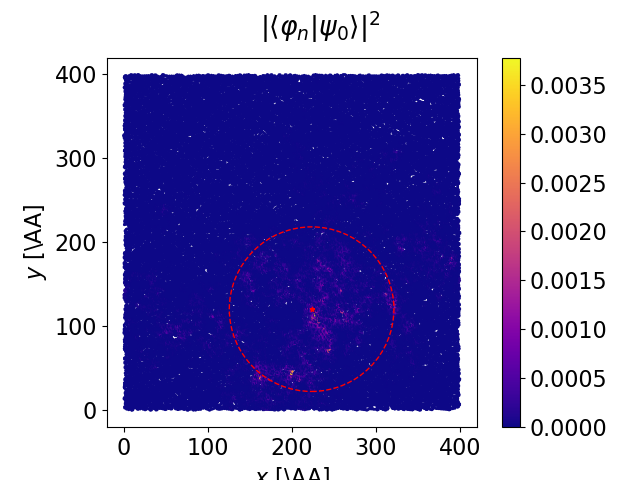



**** 104 ****
eLUMO - eHOMO = -0.00035857617379148055 eV


**** 105 ****
eLUMO - eHOMO = 3.497202527569243e-15 eV
MO difference =  3.127555780077504e-11


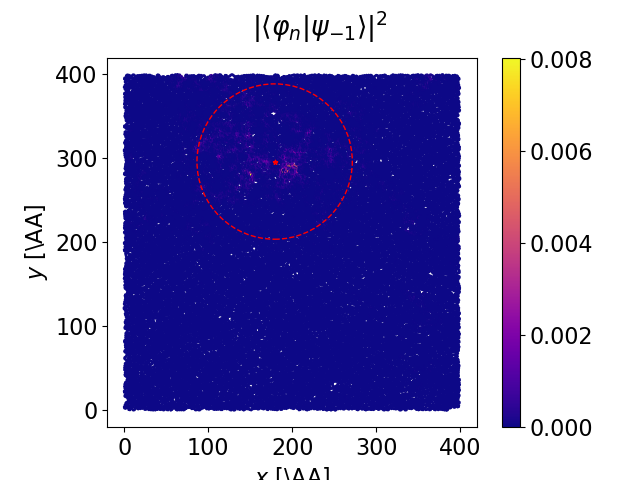

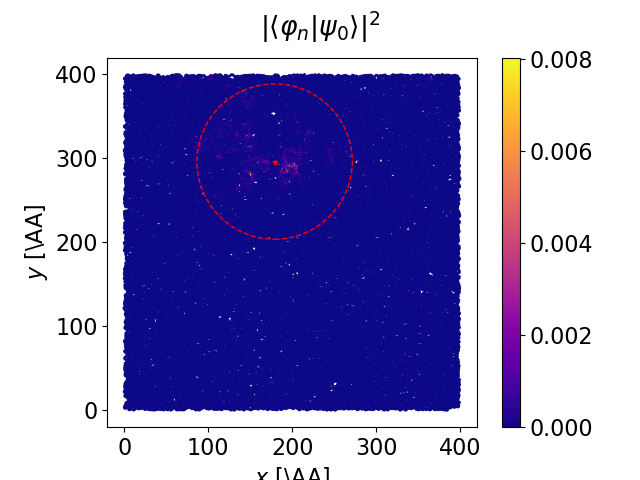



**** 107 ****
eLUMO - eHOMO = 2.0816681711721685e-15 eV
MO difference =  2.0000000000000004


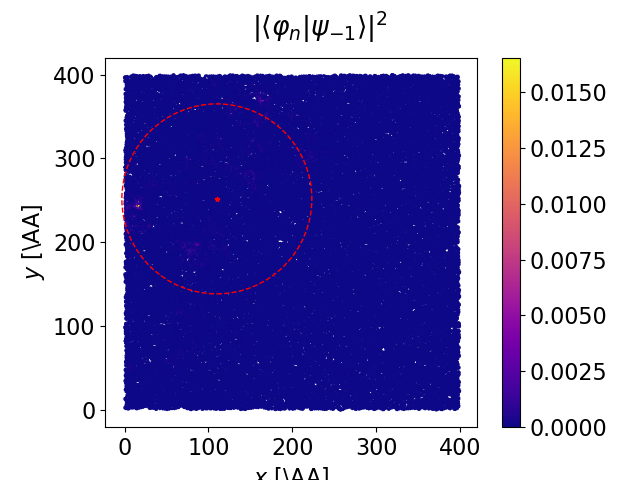

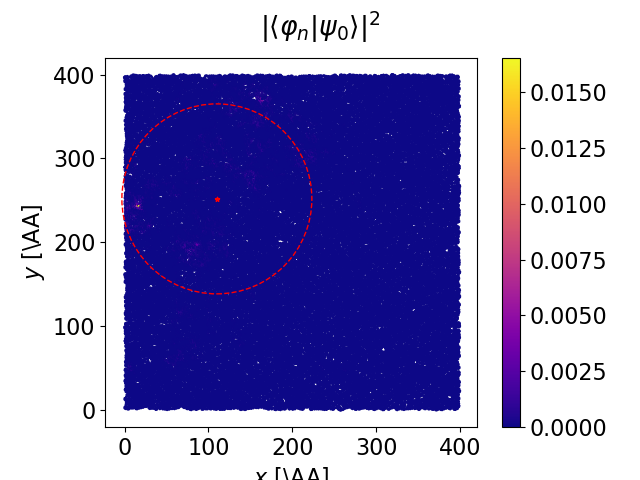



**** 108 ****
eLUMO - eHOMO = 3.608224830031759e-15 eV
MO difference =  3.5275264921221135e-10


**** 109 ****
eLUMO - eHOMO = -3.747002708109903e-15 eV
MO difference =  2.0000000000000004


**** 11 ****
eLUMO - eHOMO = -2.008220708180075e-05 eV


**** 111 ****
eLUMO - eHOMO = -0.0002967795591541089 eV


**** 113 ****
eLUMO - eHOMO = 1.8041124150158794e-15 eV
MO difference =  5.2317342439375636e-11


**** 114 ****
eLUMO - eHOMO = -0.0004758649750168098 eV


**** 115 ****
eLUMO - eHOMO = -1.0880185641326534e-14 eV
MO difference =  2.0


**** 117 ****
eLUMO - eHOMO = 6.5780714209040525e-15 eV
MO difference =  2.0000000000000004


**** 118 ****
eLUMO - eHOMO = 5.467848396278896e-15 eV
MO difference =  9.450746801538512e-11


**** 12 ****
eLUMO - eHOMO = 1.8318679906315083e-15 eV
MO difference =  6.481164634430418e-12


**** 120 ****
eLUMO - eHOMO = -9.71445146547012e-16 eV
MO difference =  7.265119788571696e-12


**** 121 ****
eLUMO - eHOMO = 2.9976021664879227e-15 eV
MO difference =  4

In [19]:
check_files = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/*npy')

check_labels = np.sort([f.split('-')[1].split('.')[0] for f in check_files])

eocc_check = energies_arpack(edir_occ,check_labels)
evir_check = energies_arpack(edir_vir,check_labels)
Mocc_check = mos_arpack(Mdir_occ,check_labels)
Mvir_check = mos_arpack(Mdir_vir,check_labels)
pos_check = gen_pos(posdir,check_labels,rCC)

eps = 1e-10
k = 0

ok = np.zeros(check_labels.shape[0], dtype='bool')# samples for which all obtained virt MOs are virt 
good = np.zeros(check_labels.shape[0], dtype='bool')# samples for which the obtained occupied/virtual states are actually occ/virt
better = np.zeros(check_labels.shape[0], dtype='bool') # samples for which the occ/virt states obtained include the HOMO/LUMO

for i, n, eoccs, evirs, Moccs, Mvirs, pos in zip(range(check_labels.shape[0]),check_labels, eocc_check, evir_check, Mocc_check, Mvir_check, pos_check):
    dN = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/dN-{n}.npy')
    N = pos.shape[0]
    if dN[0] == dN[1]:
        print(f'**** {n} ****')
        sorted_iocc = np.argsort(eoccs)
        sorted_ivir = np.argsort(evirs)

        eoccs = eoccs[sorted_iocc]
        evirs = evirs[sorted_ivir]
        Moccs = Moccs[:,sorted_iocc]
        Mvirs = Mvirs[:,sorted_ivir]
        
        eHOMO = eoccs[-1]
        eLUMO = evirs[0]

        gap = eLUMO - eHOMO

        print(f'eLUMO - eHOMO = {gap} eV')

        if np.abs(gap) < eps:
            print('MO difference = ', np.linalg.norm(Moccs[:,-1] - Mvirs[:,0]))
            if k <= 3:
                k+=1
                plot_MO(pos,Moccs,-1,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)
                plot_MO(pos,Mvirs,0,dotsize=1.0,show_COM=True,show_rgyr=True,show=True,usetex=False)
        print('\n')

    if dN[0] < N/2 and dN[1] >= N/2:
        good[i] = True
        if dN[0] == (N // 2) - 1 and dN[1] == N//2:
            better[i] = True

    if dN[1] >= N/2:
        ok[i] = True

ok_lbls = check_labels[ok]
good_lbls = check_labels[good]
better_lbls = check_labels[better]


Structures with $E_{LUMO} - E_{HOMO} < 10^{-10}$ (i.e. 0 bandgap) have matching frontier orbitals:

$$
E_{LUMO} - E_{HOMO} \approx 0 \implies | \langle\Delta | \Delta \rangle | = 
\begin{cases}
     0 &\iff |\psi_{HOMO}\rangle = |\psi_{LUMO}\rangle \\
     2 &\iff |\psi_{HOMO}\rangle = -|\psi_{LUMO}\rangle\ \\ 
\end{cases}
\,,
$$

where $|\Delta\rangle = |\psi_{HOMO}\rangle - |\psi_{LUMO}\rangle$, and $\langle\psi_{HOMO}|\psi_{HOMO}\rangle = \langle\psi_{HOMO}|\psi_{HOMO}\rangle = 1$.

So that's all good. However we have a whole host of structures for which $\mathcal{N}_{>}(E_{HOMO}) = \mathcal{N}_{>}(E_{LUMO})$ ($\mathcal{N}_{>}(\lambda)\equiv\,$ number of eigenvalues smaller than $\lambda$) but for which $E_{LUMO} - E_{HOMO}\neq 0$. This is problematic. I'll check those out later.

Let's figure out which occupied/virtual MOs I obtained are actually occupied/virtual.

In [20]:
occfiles_check = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/*npy')
lbls_occ_check = np.sort([int(f.split('-')[1].split('.')[0]) for f in occfiles_check])

virtfiles_check = glob('/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/*npy')
lbls_virt_check = np.sort([int(f.split('-')[1].split('.')[0]) for f in virtfiles_check])

all_lbls_virt = np.load('vir_lbls.npy')

print(np.all(lbls_occ_check == lbls_virt_check)) #True

Natoms = np.load('natoms.npy')

nHOMO_found = 0
nLUMO_found = 0
nboth_found = 0

occ_starts = np.ones(lbls_virt_check.shape[0], 'int') * -1000
virt_starts = np.ones(lbls_virt_check.shape[0], 'int') * -1000



for k, n in enumerate(lbls_virt_check):
    found_iHOMO = False
    found_iLUMO = False

    print(f'****** {n} ******') 
    odN = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/occupied/odN-{n}.npy')
    vdN = np.load(f'/Users/nico/Desktop/simulation_outputs/percolation/40x40/gap_check/virtual/vdN-{n}.npy')

    odN = odN
    vdN = vdN

    matching_ind = (all_lbls_virt == n).nonzero()[0]
    N = Natoms[matching_ind]

    Nhalf = N // 2

    odN -= (Nhalf-1)
    occ_inds = (odN <= 0).nonzero()[0]
    occ_starts[k] = np.min(occ_inds)
    print(occ_starts[k])

    vdN -= Nhalf
    virt_inds = (odN >= 0).nonzero()[0]
    virt_starts[k] = np.min(virt_inds)
    print(virt_starts[k])

    print('\n')

print('*********************')
print('Nb of "good" runs (i.e. even number of C atoms) = ',lbls_virt_check.shape[0])
print('Nb of structures for whom all obtained virtual MOs are actually virtual = ',(virt_starts == 0).sum())
print('Nb of structures for whom all obtained occupied MOs are actually occupied = ',(occ_starts == 0).sum())

True
****** 3 ******
2
0


****** 10 ******
2
0


****** 11 ******
2
0


****** 16 ******
2
0


****** 17 ******
2
0


****** 18 ******
1
0


****** 20 ******
2
0


****** 21 ******
2
0


****** 22 ******
1
0


****** 23 ******
2
0


****** 27 ******
2
0


****** 28 ******
2
0


****** 30 ******
1
0


****** 32 ******
2
0


****** 38 ******
1
0


****** 39 ******
2
0


****** 40 ******
2
0


****** 42 ******
2
0


****** 44 ******
2
0


****** 45 ******
2
0


****** 52 ******
2
0


****** 54 ******
2
0


****** 55 ******
1
0


****** 56 ******
1
0


****** 57 ******
2
0


****** 59 ******
1
0


****** 60 ******
2
0


****** 61 ******
2
0


****** 63 ******
2
0


****** 64 ******
1
0


****** 68 ******
2
0


****** 69 ******
2
0


****** 70 ******
2
0


****** 71 ******
2
0


****** 75 ******
2
0


****** 76 ******
2
0


****** 80 ******
1
0


****** 81 ******
1
0


****** 84 ******
2
0


****** 93 ******
1
0


****** 94 ******
2
0


****** 98 ******
2
0


****** 102 ******
1
0


******

All virtual states I obtained are actually virtual. On the other hand, all of the arrays of occupied states I obtianed contain at least one virtual MO.

KeyboardInterrupt: 

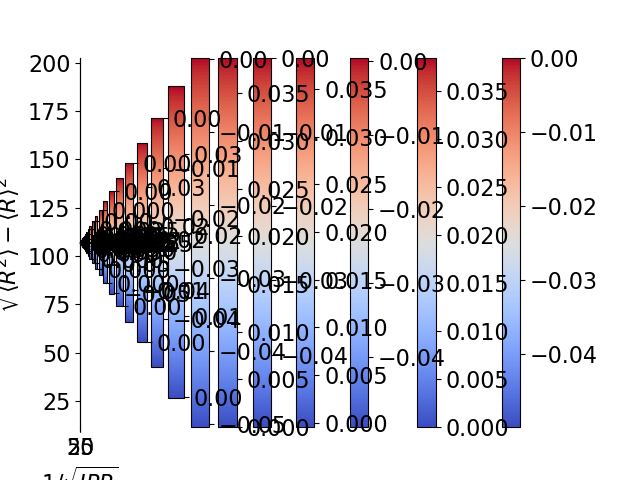

In [24]:
from qcnico.qcplots import plot_loc_discrep
from qcnico.qchemMAC import inverse_participation_ratios, MO_rgyr

good_eoccs = energies_arpack(edir_occ,lbls_occ_check)
good_Moccs = mos_arpack(Mdir_occ,lbls_occ_check)
good_evirs = energies_arpack(edir_vir,lbls_occ_check)
good_Mvirs = mos_arpack(Mdir_vir,lbls_occ_check)
good_pos = gen_pos(posdir,lbls_occ_check,rCC)

fig, ax = plt.subplots()

for eoccs, evirs, Mocc, Mvir, pos, is_occ, is_vir, in zip(good_eoccs,good_evirs,good_Moccs,good_Mvirs,good_pos, occ_starts, virt_starts):
    ioccs = np.argsort(eoccs)
    ivirs = np.argsort(evirs)

    eoccs = eoccs[ioccs]
    eoccs = eoccs[is_occ:]
    
    evirs = evirs[ivirs]
    evirs = evirs[is_vir:]

    Mocc = Mocc[:,ioccs]
    Mocc = Mocc[:,is_occ:]
    
    Mvir = Mvir[:,ivirs]
    Mvir = Mvir[:,is_vir:]

    eF_approx = (eoccs[-1] + evirs[0]) * 0.5 #approximate because the extremal occ/virt energies are not necessarily eHOMO/eLUMO

    eoccs -= eF_approx
    evirs -= eF_approx

    iprs_occ = inverse_participation_ratios(Mocc)
    rgyrs_occ = MO_rgyr(pos,Mocc)

    plot_loc_discrep(iprs_occ, rgyrs_occ, eoccs, plt_objs=(fig, ax), usetex=False, show=False,cmap='coolwarm',show_cbar=False)

    iprs_vir = inverse_participation_ratios(Mvir)
    rgyrs_vir = MO_rgyr(pos,Mvir)

    plot_loc_discrep(iprs_vir, rgyrs_vir, evirs, plt_objs=(fig, ax), usetex=False, show=False,cmap='coolwarm',show_cbar=False)

plt.show()